In [1]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Convolution2D
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from sklearn.model_selection import train_test_split
from math import ceil

In [2]:
dataset_train = './dataset/asl_alphabet_train'
dataset_test = './dataset/asl_alphabet_test'
model_save = './model7.hdf5'

In [3]:
imgs=[]
labels=[]
list_dir=os.listdir(dataset_train)
for label in range(len(list_dir)):
    print("Loading images form ", list_dir[label])
    for img_name in os.listdir(dataset_train+"/"+list_dir[label]):
        img=cv.imread(dataset_train+"/"+list_dir[label]+"/"+img_name)
        img=cv.GaussianBlur(img,(3,3),2)
        img=cv.resize(img, (64,64))
        imgs.append(img)
        labels.append(label)


Loading images form  A
Loading images form  B
Loading images form  C
Loading images form  D
Loading images form  del
Loading images form  E
Loading images form  F
Loading images form  G
Loading images form  H
Loading images form  I
Loading images form  J
Loading images form  K
Loading images form  L
Loading images form  M
Loading images form  N
Loading images form  nothing
Loading images form  O
Loading images form  P
Loading images form  Q
Loading images form  R
Loading images form  S
Loading images form  space
Loading images form  T
Loading images form  U
Loading images form  V
Loading images form  W
Loading images form  X
Loading images form  Y
Loading images form  Z


In [4]:
imgs=np.array(imgs)
normalisedX=imgs.astype('float32')/255
label_encode=utils.to_categorical(labels)
x_train, x_test, y_train, y_test=train_test_split(normalisedX, label_encode, test_size=0.2)

In [5]:
classes = 29
batch = 32
epochs = 16
learning_rate = 0.003

In [6]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same', input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding='same', input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dense(classes, activation='softmax'))

In [7]:
adam = Adam(lr=learning_rate)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\danie\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [8]:
history = model.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_split=0.2, shuffle = True, verbose=1)

Epoch 1/30
1740/1740 [==============================] - 30s 13ms/step - loss: 2.2935 - accuracy: 0.3696 - val_loss: 1.7261 - val_accuracy: 0.4422
Epoch 2/30
1740/1740 [==============================] - 22s 13ms/step - loss: 0.7492 - accuracy: 0.7470 - val_loss: 0.5954 - val_accuracy: 0.7977
Epoch 3/30
1740/1740 [==============================] - 24s 14ms/step - loss: 0.2710 - accuracy: 0.9092 - val_loss: 0.3986 - val_accuracy: 0.8764
Epoch 4/30
1740/1740 [==============================] - 23s 13ms/step - loss: 0.1688 - accuracy: 0.9465 - val_loss: 8.3478 - val_accuracy: 0.4206
Epoch 5/30
1740/1740 [==============================] - 22s 13ms/step - loss: 0.1306 - accuracy: 0.9604 - val_loss: 0.4819 - val_accuracy: 0.8999
Epoch 6/30
1740/1740 [==============================] - 22s 13ms/step - loss: 0.1066 - accuracy: 0.9686 - val_loss: 0.1047 - val_accuracy: 0.9619
Epoch 7/30
1740/1740 [==============================] - 22s 13ms/step - loss: 0.0982 - accuracy: 0.9714 - val_loss: 0.0678 -

In [9]:
model.save(model_save)

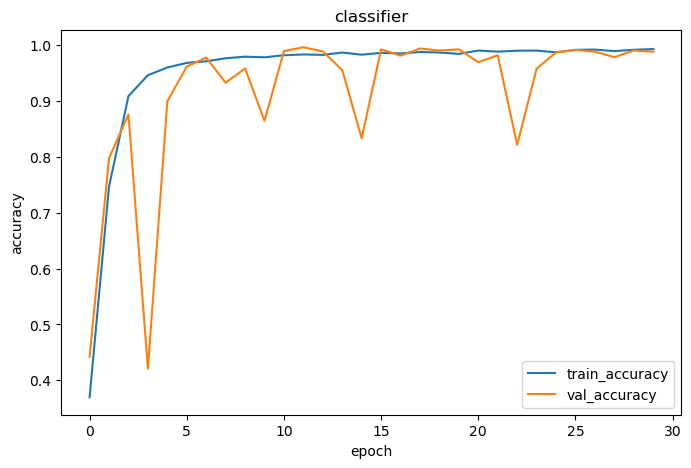

: 

In [10]:
plt.figure(figsize=(8,5))

plt.plot(history.history['accuracy'], label='train_accuracy',)
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.title("classifier")

plt.show()